In [ ]:
#Week10

In [23]:
%%time
import psi4
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
psi4.set_output_file('output.dat', False)

CPU times: user 274 µs, sys: 923 µs, total: 1.2 ms
Wall time: 979 µs


PosixPath('output.dat')

In [10]:
%%time
#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

CPU times: user 301 ms, sys: 11.9 ms, total: 313 ms
Wall time: 318 ms


-76.02663273509017

In [11]:
%%time
#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 292 ms, sys: 16.8 ms, total: 309 ms
Wall time: 654 ms


-38.925334628937065

In [12]:
%%time
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!
CPU times: user 862 ms, sys: 26.4 ms, total: 888 ms
Wall time: 1.01 s


-76.0270327293733

In [13]:
%%time
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)


CPU times: user 1.02 s, sys: 15.9 ms, total: 1.04 s
Wall time: 1.04 s


In [14]:
%%time
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")


CPU times: user 1.1 ms, sys: 18 µs, total: 1.12 ms
Wall time: 1.11 ms


In [15]:
%%time
psi4.set_options({'scf_type': 'df',
                  'freeze_core': True})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

CPU times: user 3.97 s, sys: 233 ms, total: 4.2 s
Wall time: 4.3 s


-0.0022355823909805178

In [16]:
%%time
#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.38 s, sys: 1.62 s, total: 7 s
Wall time: 7.44 s


### Part 2

When you get to the end of the tutorial, you will have computed the energy of Neon at several different distances.

Now for this part, compute the energy of two Argon molecules at distances from 3.5 to 6 angstroms
Use scipy curve_fit to fit this curve to a lennard-jones potential with parameters sigma and eps as below
def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )`
Make a nice plot of the energy versus distance with the computed values as dots and the values from the fit function with a dashed line, as shown in the lecture
Save this figure in the figures directory

In [24]:
#Plot Energy vs. Distance
#Computed values = dots
#Values from fit function = dashed line
#Save fig

psi4.set_output_file('Argon_output.dat', False)

#! Example potential energy surface scan and CP-correction for Ne2

ar_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = [3.5, 3.75, 4.0,4.25, 4.5,5.0, 5.5, 6.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")


energy_list=[]
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    energy_list.append(e)
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

print(energy_list)

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.168852
            3.8                        -0.069952
            4.0                        -0.123122
            4.2                        -0.116537
            4.5                        -0.095162
            5.0                        -0.055927
            5.5                        -0.032054
            6.0                        -0.018843
[0.1688516572747894, -0.06995215266227832, -0.12312239340551778, -0.1165369378917531, -0.09516239548304115, -0.05592692077679129, -0.03205425461515208, -0.0188429137424495]


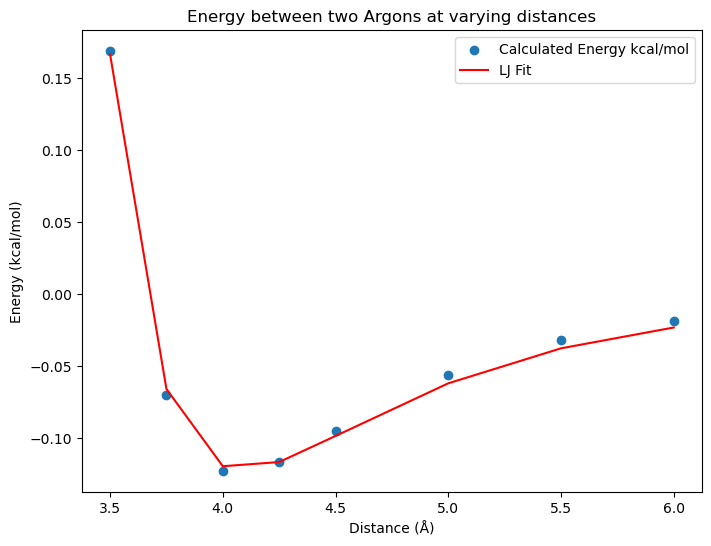

In [25]:
def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )

popt, pcov = curve_fit(lj, Rvals, energy_list, p0=[3.5,1.0])

plt.figure(figsize=(8, 6))
plt.scatter(Rvals, energy_list, label = "Calculated Energy kcal/mol")
plt.plot(Rvals, lj(Rvals, *popt), 'r', label='LJ Fit')

plt.legend()
plt.xlabel('Distance (Å)')
plt.ylabel('Energy (kcal/mol)')
plt.title('Energy between two Argons at varying distances')

plt.savefig("Figures/Ar-Ar_dist.png", dpi=300)
